# INTRODUCTION
This document contains a full example about *how to develop an analysis using the pyFHOFEA package*. It will cover from the geometry creation until the post-processing phase.

It is recommended to put the *pyFHOFEA.py*  file in the same folder of your current script.

Make sure that you have all the packages described at the *read.me* file.

# GEOMETRY CREATION

The geometry must be created by the *Gmsh* software. This is an open source software and you can download it by clicking [here](https://gmsh.info/). 


## Creating a New File

After opening *Gmsh*, create a new file by clicking on the options shown on the figure below.

<img src="Example_Figures/Fig01.png" width=200>

After this, two windows will appear.

Select *Use .'geo' extension*.

<img src="Example_Figures/Fig02.png" width=600>

And select *Built-in*.

<img src="Example_Figures/Fig03.png" width=300>

The steps above can be used for any new geometry.

## DEFINING THE GEOMETRY

After creating a new file, you can define the shape of the geometry by using the features available on the *Modules-Geometry-Elementary entities-Add* section as shown on the figure below.

<img src="Example_Figures/Fig04.png" width=200>

**IMPORTANT TIP:** remember that the pyFHOFEA can analyse just 2D geometries.

The next steps show how to create a plate with a hole in its center.


### DEFINING THE VERETICES, EDGES AND PLANE SURFACES

The vertex can be defined by the *Point* option. After clicking on that option a new window will appear and it is recommended to turn on the *freeze* option (A) on all axes. The rectangular coordinates of each vertex must be typed on the X, Y and Z text box (B). 

The external dimensions of the geometry are:
* Length: 150mm;
* Height: 45mm.

Considering the dimensions above, the coordinates can be:
* Vertex 1 $\to$ (0; 0);
* Vertex 2 $\to$ (0; 45);
* Vertex 3 $\to$ (150; 45);
* Vertex 4 $\to$ (150; 0).

After typing each coordinate, click on the *Add* button (C).

<img src="Example_Figures/Fig05.png" width=600>

After defining all the four vertices, you can connect then with the *Line* option. For this, you must click on *Line* and select the vertex two by two in the same order as the list above.
When selecting the vertex to build the lines, the shape of the cursor will change to a black cross when exactly above the vertex.

<img src="Example_Figures/Fig06.png" width=200>

After define all the lines, the external geometry will be like this:

<img src="Example_Figures/Fig07.png" width=600>

To define the circle on the center of the geometry, three more vertices must be inserted: the center of the circle, and two other points lying on its radius and rotated 180°. The coordinates are:

* Center $\to$ (75; 22.5);
* Point 1 $\to$ (86.25; 22.5);
* Point 2 $\to$ (63.75; 22.5);

In sequence, the *Circle arc* option should be used to define the arcs that are part of the entire circle. The option *Circle arc* was the only one that could be recognized as a real hole in the geometry.

<img src="Example_Figures/Fig08.png" width=200>

After clicking on the vertices in the correct order, a full circle should be displayed.

<img src="Example_Figures/Fig09.png" width=600>

**IMPORTANT TIP:** pay attention to the instructions given by the Gmsh software when a command is selected. These instructions are shown on the top of the window.

With all the edges defined, the option *Plane surface* is used to define the area for the mesh to be created.

<img src="Example_Figures/Fig10.png" width=200>

After clicking on the *Plane Surface* option, all the external edges must be selected first and the central circle should be informed as a *hole boundary*.

<img src="Example_Figures/Fig11.png" width=600>

### DEFINING THE PHYSICAL GROUPS

With the complete geometry defined, you can give names to the vertices, edges and surfaces that will be used as boundary conditions during the analysis by the pyFHOFEA.

These boundary conditions must be defined inside the Gmsh software by accessing physical groups on the *Modules-Geometry-Physical groups-Add* section.

<img src="Example_Figures/Fig12.png" width=200>

In this example, all the external edges will be named. Since we are selecting edges, the option *Curve* should be used.

After clicking on the *Curve* option, give a name for the edge and then select the respective edge.

<img src="Example_Figures/Fig13.png" width=1000>

All the external edges on this example are named in respect of their positions:
* RE: right edge;
* LE: left edge;
* TE: top edge;
* BE: bottom edge.

It is extremely important to define physical groups to all the plane surfaces created too. If you miss this step, the script will not find the mesh data of the geometry. The process to define these physical group is exactly the same of the ones with the edges, but the option *Surface* must be used.

<img src="Example_Figures/Fig14.png" width=1000>


### DEFINING THE MESH

The mesh is generated by clicking on the *2D* option available on the *Modules-Mesh* section.

**IMPORTANT TIP:** remember that the pyFHOFEA works just with triangular elements until now. So, make sure to have a mesh formed solely by triangular elements.

<img src="Example_Figures/Fig15.png" width=200>

After clicking on the *2D* option, the mesh should be generated as illustrated by the figure below:

<img src="Example_Figures/Fig16.png" width=1000>

To save the *.msh* file that will be imported by the pyFHOFEA, you can click on the *Save* option.

<img src="Example_Figures/Fig17.png" width=200>

After defining all the parameters above, you are ready to proceed to the analysis using the pyFHOFEA package. Always remember: **this package is just for academic use**.

# pyFHOFEA - EXAMPLE 1

## PRE-PROCESSING PHASE

In this phase of the analysis, you will import the *pyFHOFEA* package and set the following parameters:
* Directory of the *.msh* file;
* Plate thickness;
* Physical properties of the material;
* External forces;
* Constraints.

In [1]:
import pyFHOFEA as pff # import the package

ex1_pre = pff.Pre_processing('Example_Geometry/Example_Geometry.msh') # path of the .msh file

In [2]:
t = 5 # plate thickness
E = 200e3 # Young's modulus
v = 0.3 # Poisson's ratio

ex1_pre.set_physical_properties(t, E, v) # setting the thickness and the material properties

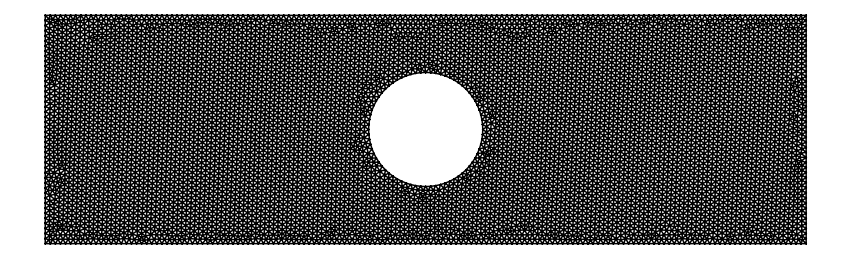

In [3]:
ex1_pre.plot_geometry() # plot the mesh for a fast check

In [4]:
print(ex1_pre.physical_group.keys()) # remember the names of the physical groups

dict_keys(['LE', 'RE', 'TE', 'BE', 'S1'])


In [5]:
ex1_pre.mesh_statistics() # get the quantity and nodes and elements


Quantity of nodes: 7702
Quantity of elements: 14942



### DEFINING THE EXTERNAL FORCES

Use the physical groups to define where forces should be applied, must be vertices or edges.

* Physical groups with vertices: the force will be distributed equally among all the nodes;
* Physical groups with edges: the force will be divided considering a length ratio between the element length and the total length of the physical group's edge.

The user can apply as many forces as necessary, but to change the value of a force, the user must restart the analysis by running the line that has the path of the *.msh file* and all the code below it after changing the value of the force.

In [6]:
Fx = 1000 # external force on the X direction
Fy = 0 # external force on the Y direction
bc_force = 'RE' # name of the physical group where the force is applied

ex1_pre.apply_forces(bc_force, Fx, Fy) # applying the force above

### DEFINING THE CONSTRAINTS

Like the forces, the constraints are applied on the geometry informed by a given physical group.

The constraints can be applied in any kind of geometry: vertices, edges or plane surfaces. The user can define the constraints by typing:
*0 to restrict the degree of freedom;
*1 to maintain the degree of freedom.

The user can apply as many constraints as necessary, but to redefine a constraint, the user must restart the analysis by running the line that has the path of the *.msh file* and all the code below it after redefining the constraint.


In [7]:
Rx = 0 # constraint on the X direction
Ry = 0 # constraint on the Y direction
bc_constraint = 'LE' # name of the physical group where the constraint is applied

ex1_pre.set_restrictions(bc_constraint, Rx, Ry) # defining the constraints

## PROCESSING PHASE

This phase is responsible for all the calculations necessary to plot the results at the end of the analysis. You will use two methods:
* ```solve```: to assemble the global stiffness matrix and to solve the system of linear equations;
* ```get_all_results```: to calculate the stresses and strains acting on each element of the geometry.

In [8]:
ex1_pro = pff.Processing(ex1_pre) # initializing the Processing class

In [9]:
ex1_pro.solve() # solving the system of linear equations

In [10]:
ex1_pro.get_all_results() # calculating the stresses and strains

## POST-PROCESSING PHASE

In this phase, the user is able to check the stresses and strains graphically. Furthermore, the reaction value for a given *physical group* can also be verified.

The graphical results available are:
* ```strain_X```;
* ```strain_Y```;
* ```gamma_XY```;
* ```stress_X```;
* ```stress_Y```;
* ```stress_XY```;
* ```max_principal```;
* ```min_principal```;
* ```max_plane_shear```;
* ```von_mises```.

In [11]:
ex1_post = pff.Post_processing(ex1_pre, ex1_pro) # initializing the Post-processing class

In [12]:
ex1_post.reaction_values(bc_constraint) # checking the reactions on the constraint

{'LE': [-999.9999999992004, 4.674749476407669e-11]}

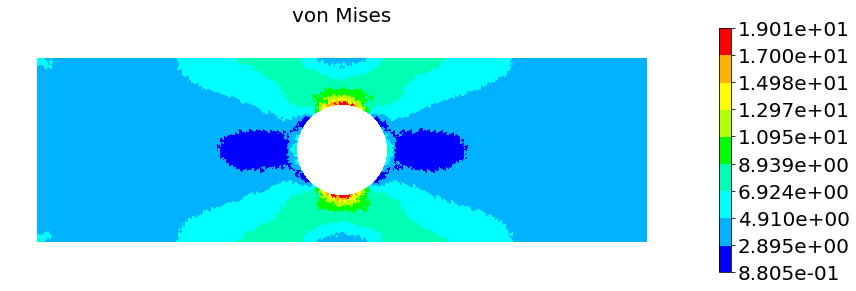

In [13]:
scale1 = 0 # no displacement
scale2 = 1 # true displacement
scale3 = 1000 # true displacement multiplied 1000 times

ex1_post.von_mises(scale1)

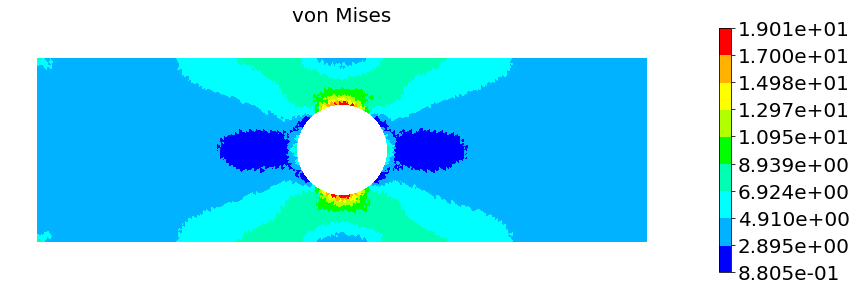

In [14]:
ex1_post.von_mises(scale2)

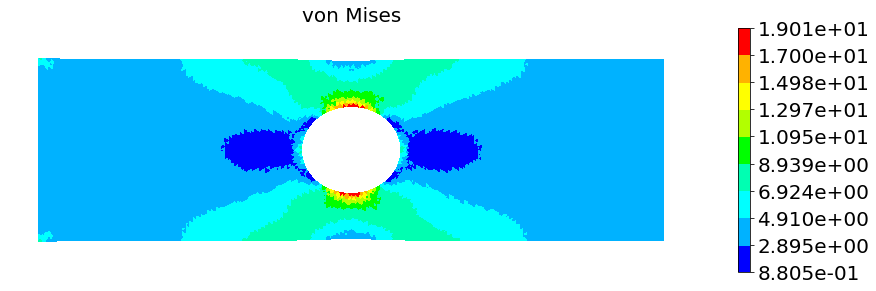

In [15]:
ex1_post.von_mises(scale3)

# pyFHOFEA - EXAMPLE 2

## GEOMETRY CREATED ON GMSH

Wireframe:
<img src="Example_Figures/Fig18.png" width=1000>

Physical groups on edges:
<img src="Example_Figures/Fig19.png" width=1000>

Physical groups on plane surfaces:
<img src="Example_Figures/Fig20.png" width=1000>

Mesh:
<img src="Example_Figures/Fig21.png" width=1000>

## PRE-PROCESSING

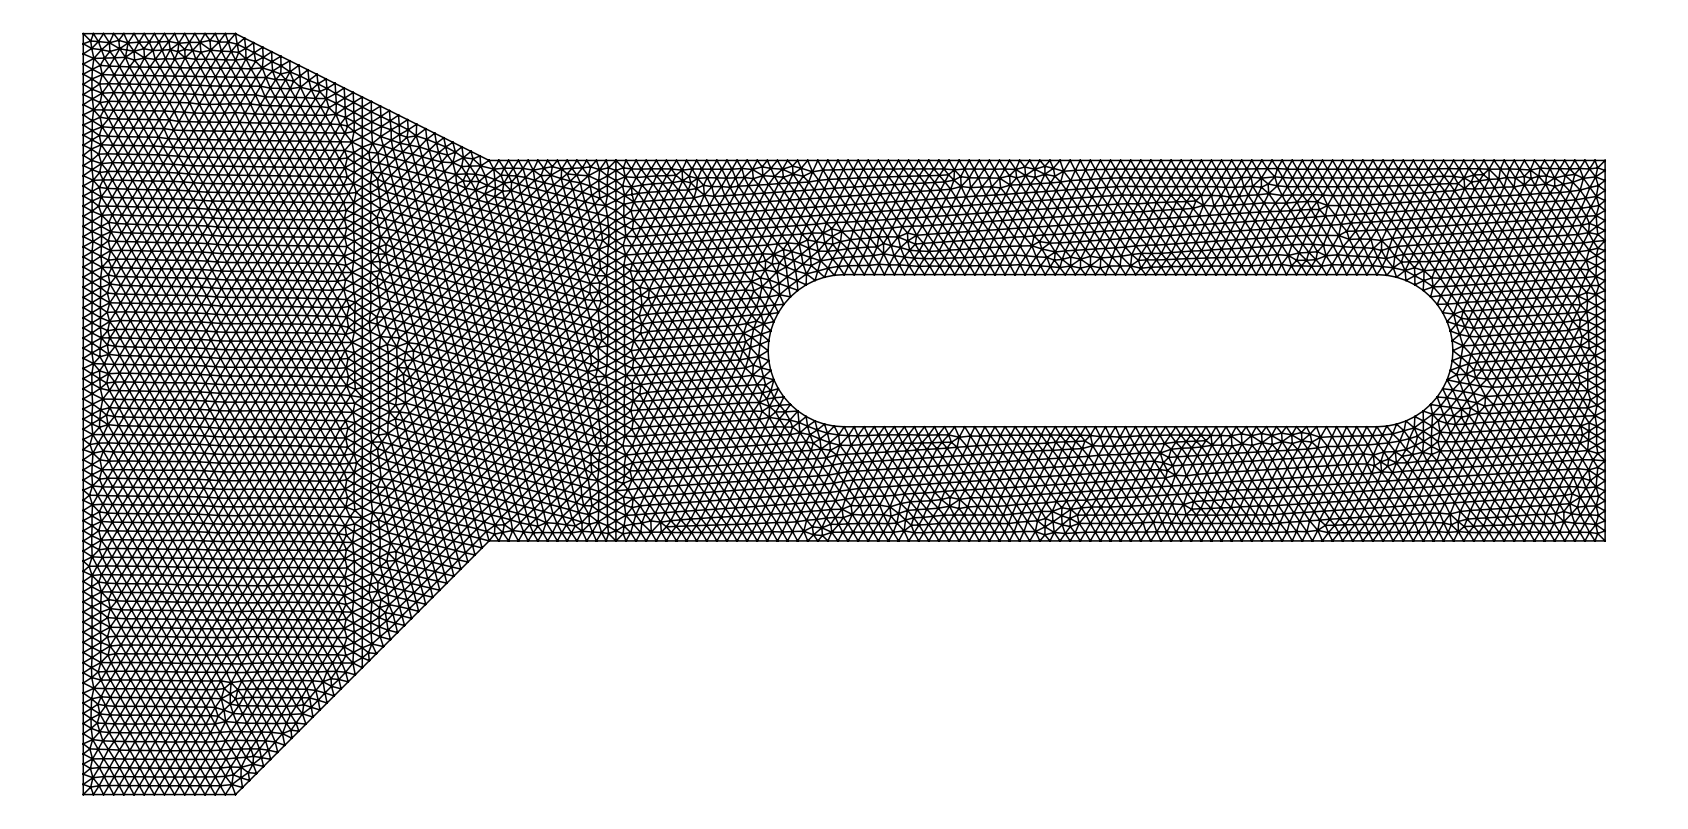


Quantity of nodes: 7158
Quantity of elements: 13733



In [16]:
import pyFHOFEA as pff # import the package

ex1_pre = pff.Pre_processing('Example_Geometry/Example_Geometry_2.msh') # path of the .msh file

t = 5 # plate thickness
E = 200e3 # Young's modulus
v = 0.3 # Poisson's ratio

ex1_pre.set_physical_properties(t, E, v) # setting the thickness and the material properties

ex1_pre.plot_geometry() # plot the mesh for a fast check

ex1_pre.mesh_statistics() # get the quantity and nodes and elements

In [17]:
print(ex1_pre.physical_group.keys()) # remember the names of the physical groups

dict_keys(['LE', 'RE', 'TE', 'BE', 'IBE', 'ITE', 'S1', 'S2', 'S3'])


In [18]:
Fx = 1000 # external force on the X direction
Fy = 0 # external force on the Y direction
bc_force = 'RE' # name of the physical group where the force is applied

ex1_pre.apply_forces(bc_force, Fx, Fy) # applying the force above

In [19]:
Rx = 0 # constraint on the X direction
Ry = 0 # constraint on the Y direction
bc_constraint = 'LE' # name of the physical group where the constraint is applied

ex1_pre.set_restrictions(bc_constraint, Rx, Ry) # defining the constraints

## PROCESSING

In [20]:
ex1_pro = pff.Processing(ex1_pre) # initializing the Processing class
ex1_pro.solve() # solving the system of linear equations
ex1_pro.get_all_results() # calculating the stresses and strains

## POST-PROCESSING

All the post-processing graphical results can show the results in a specific area of the total geometry as shown below.

In [21]:
ex1_post = pff.Post_processing(ex1_pre, ex1_pro) # initializing the Post-processing class

ex1_post.reaction_values(bc_constraint) # checking the reactions on the constraint

{'LE': [-999.9999999991453, -1.0337597444731728e-10]}

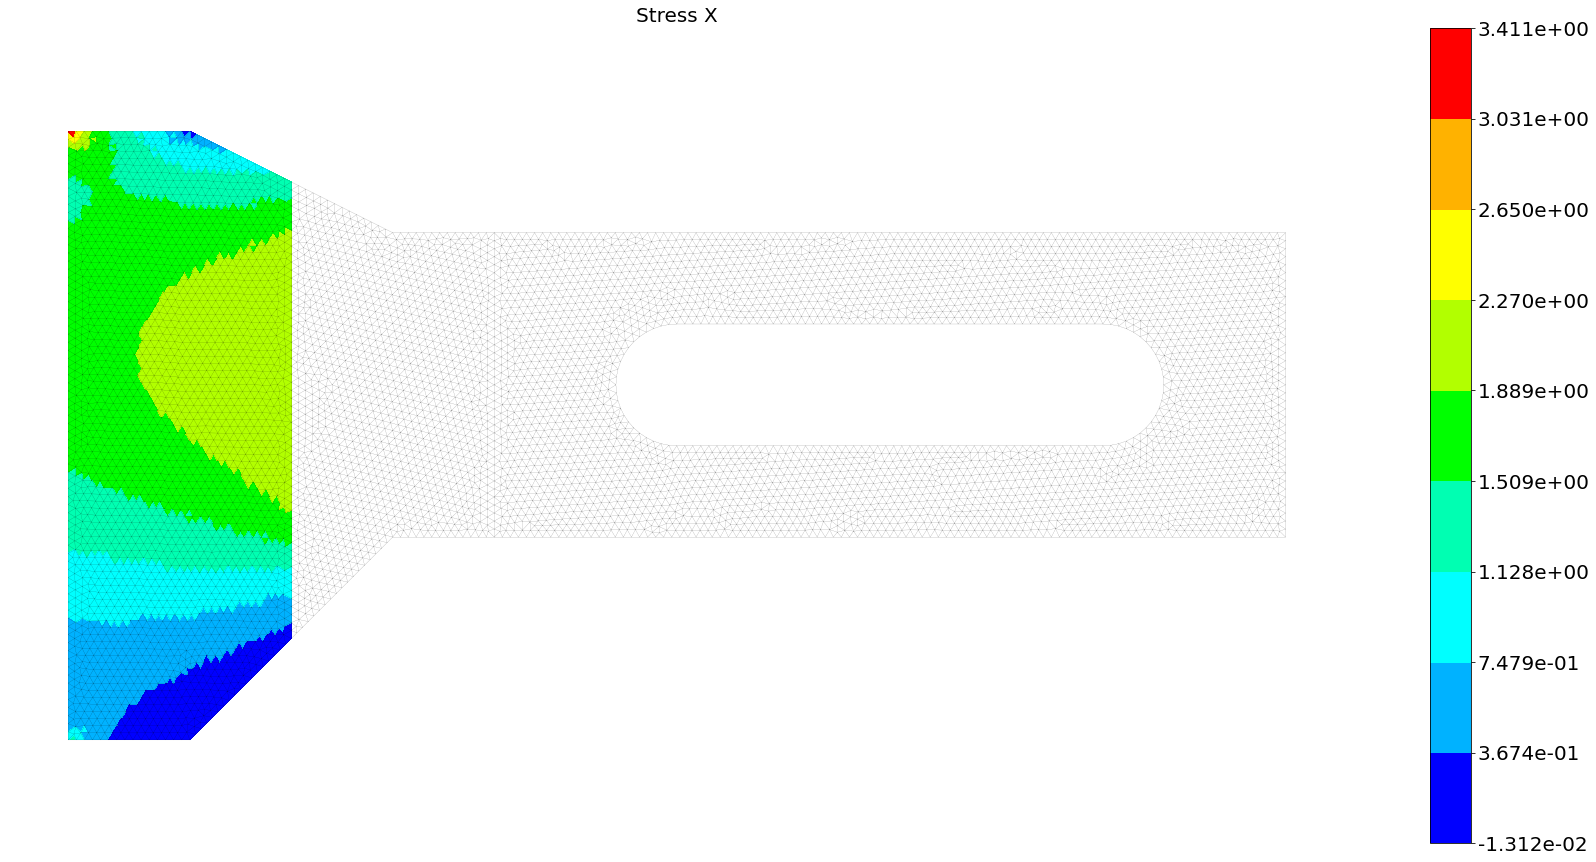

In [22]:
ex1_post.stress_X(bc='S1') # plot on surface "S1"

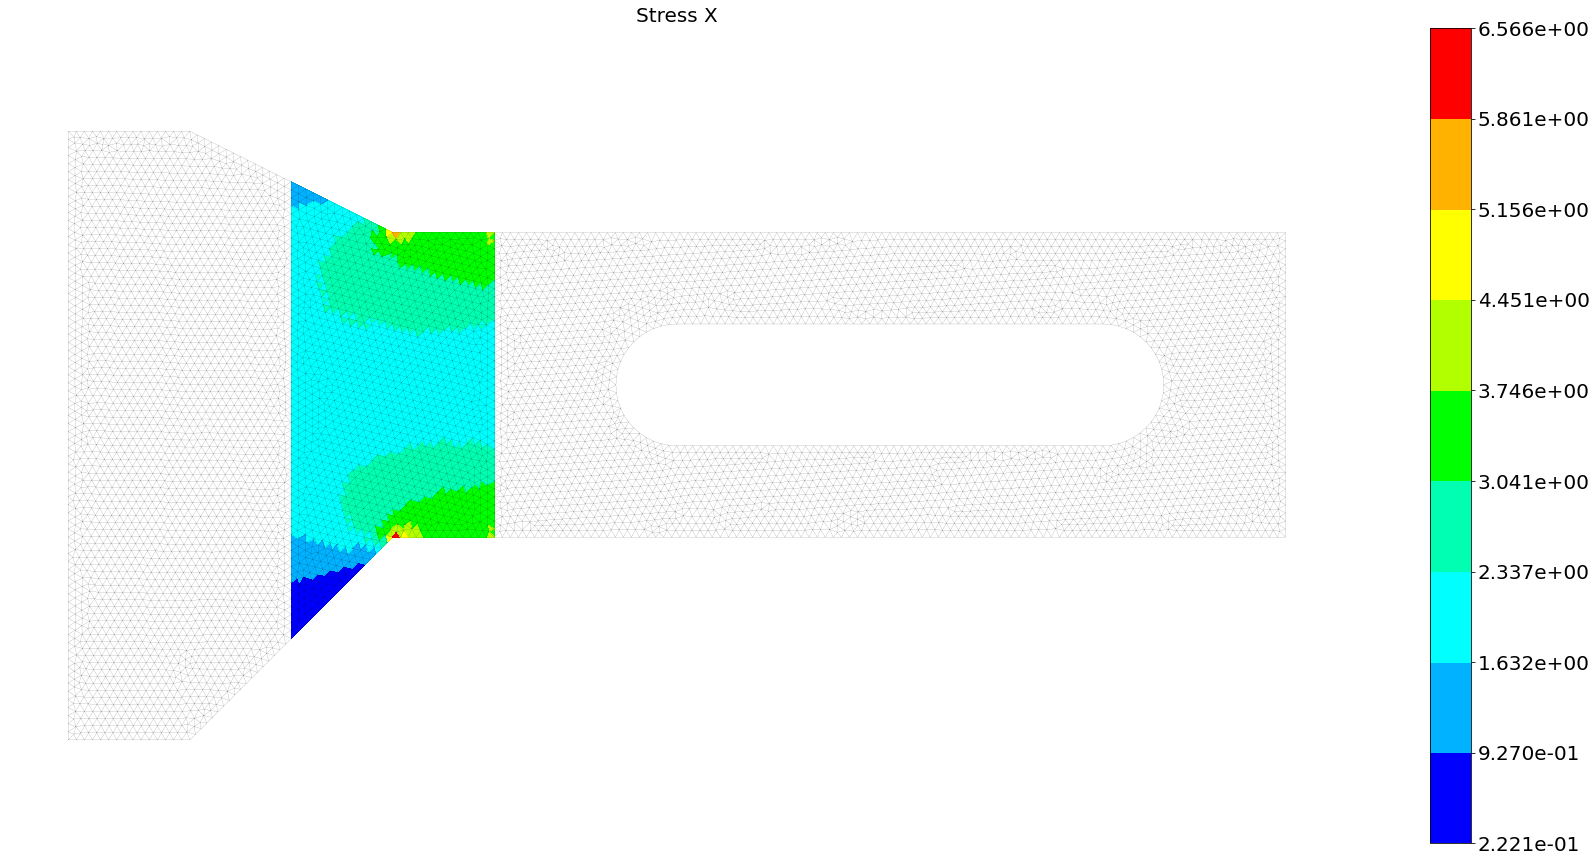

In [23]:
ex1_post.stress_X(bc='S2') # plot on surface "S2"

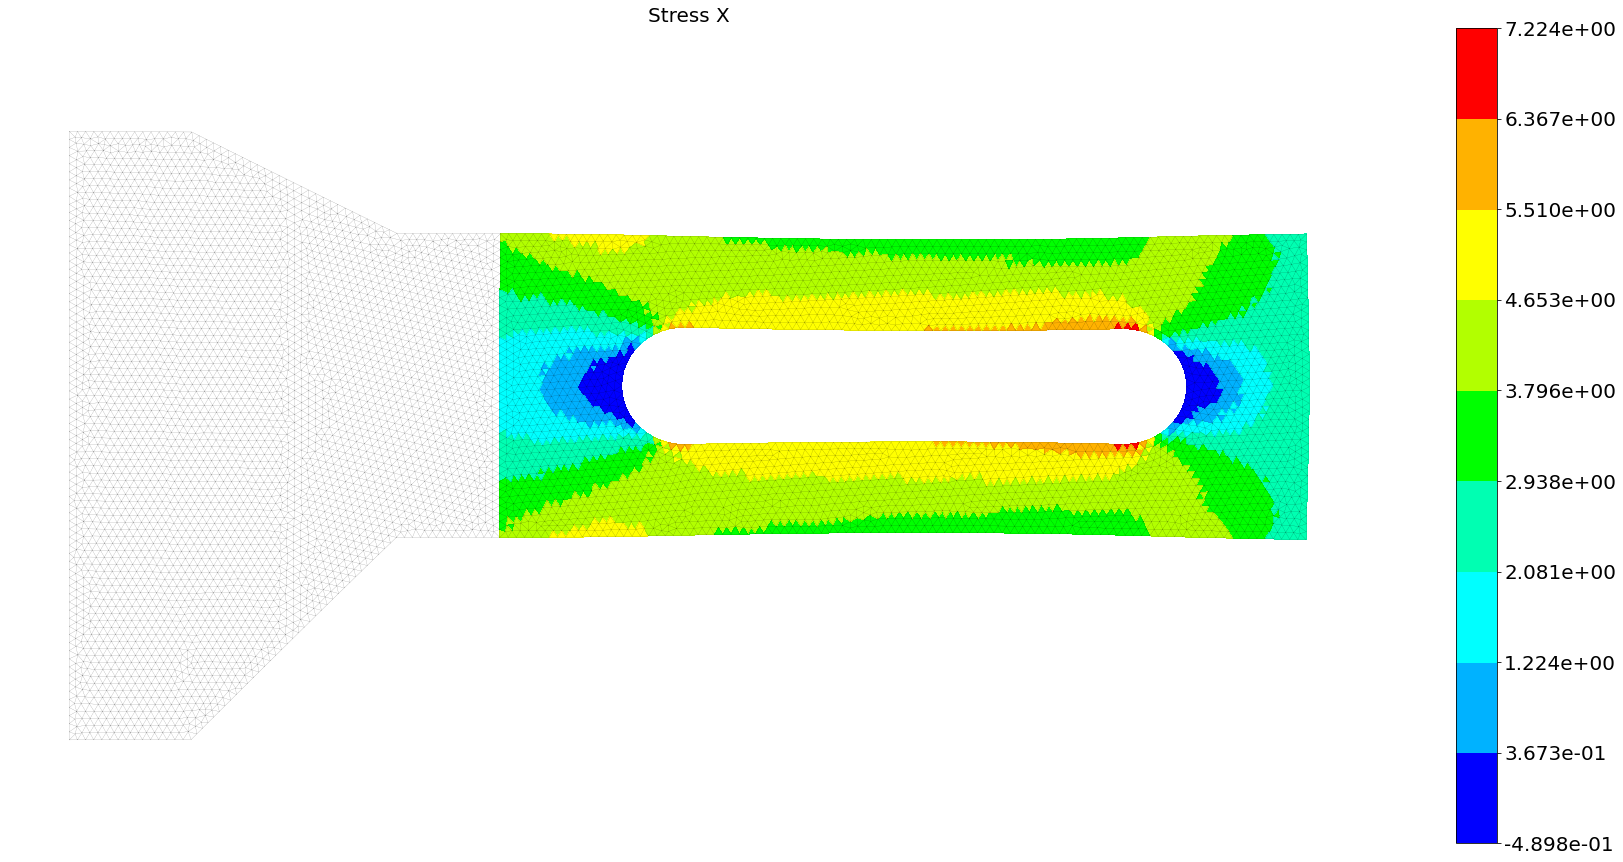

In [26]:
ex1_post.stress_X(scale=1000, bc='S3')# plot on surface "S3"

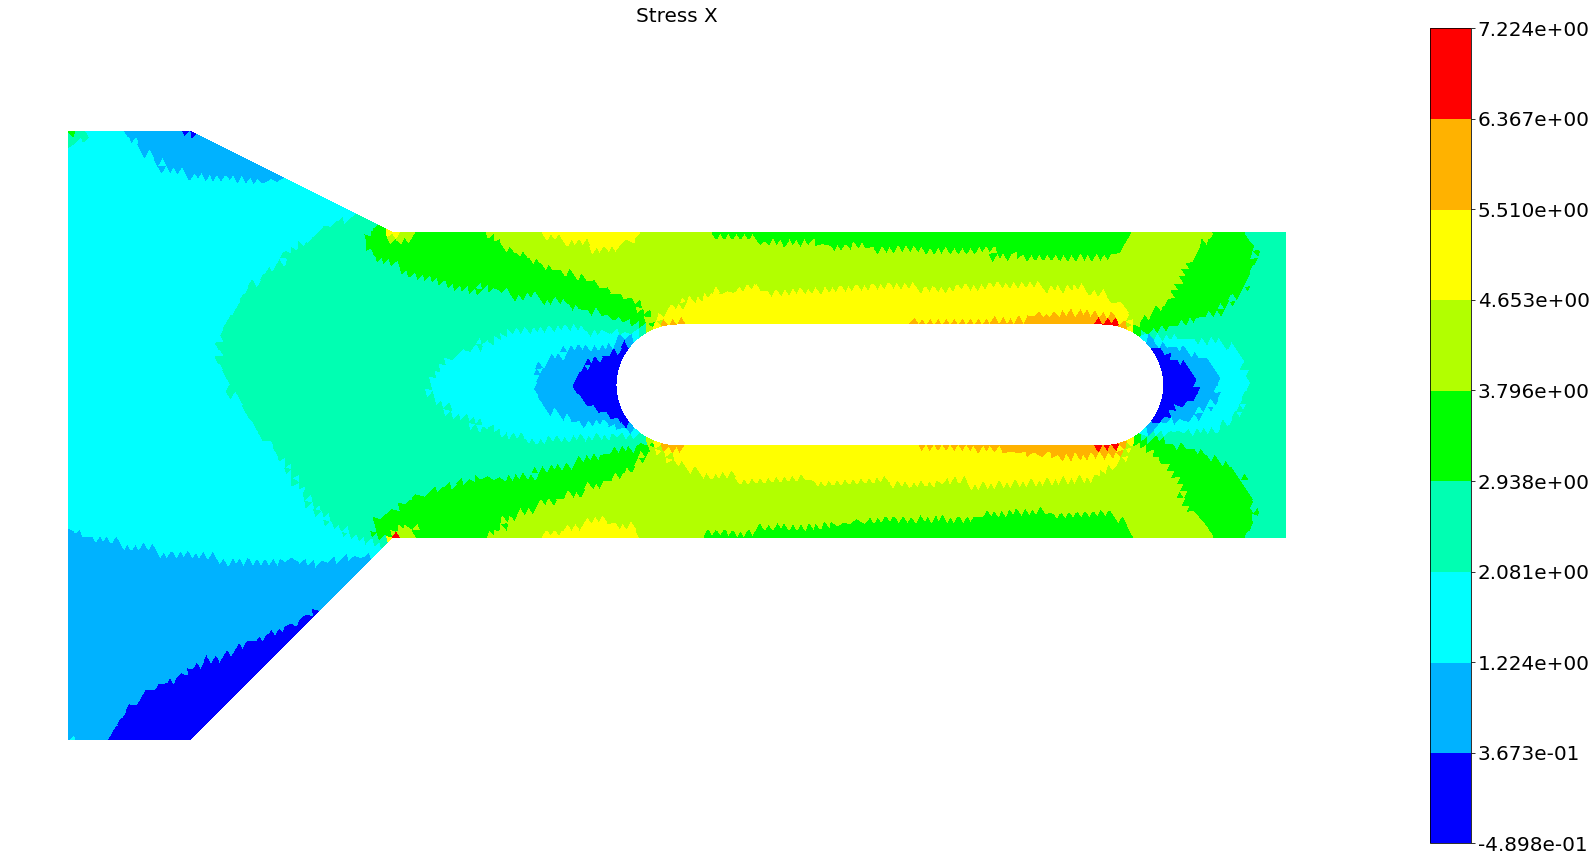

In [27]:
ex1_post.stress_X()